### Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Load the dataset

In [2]:
housing = pd.read_csv("Data/housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

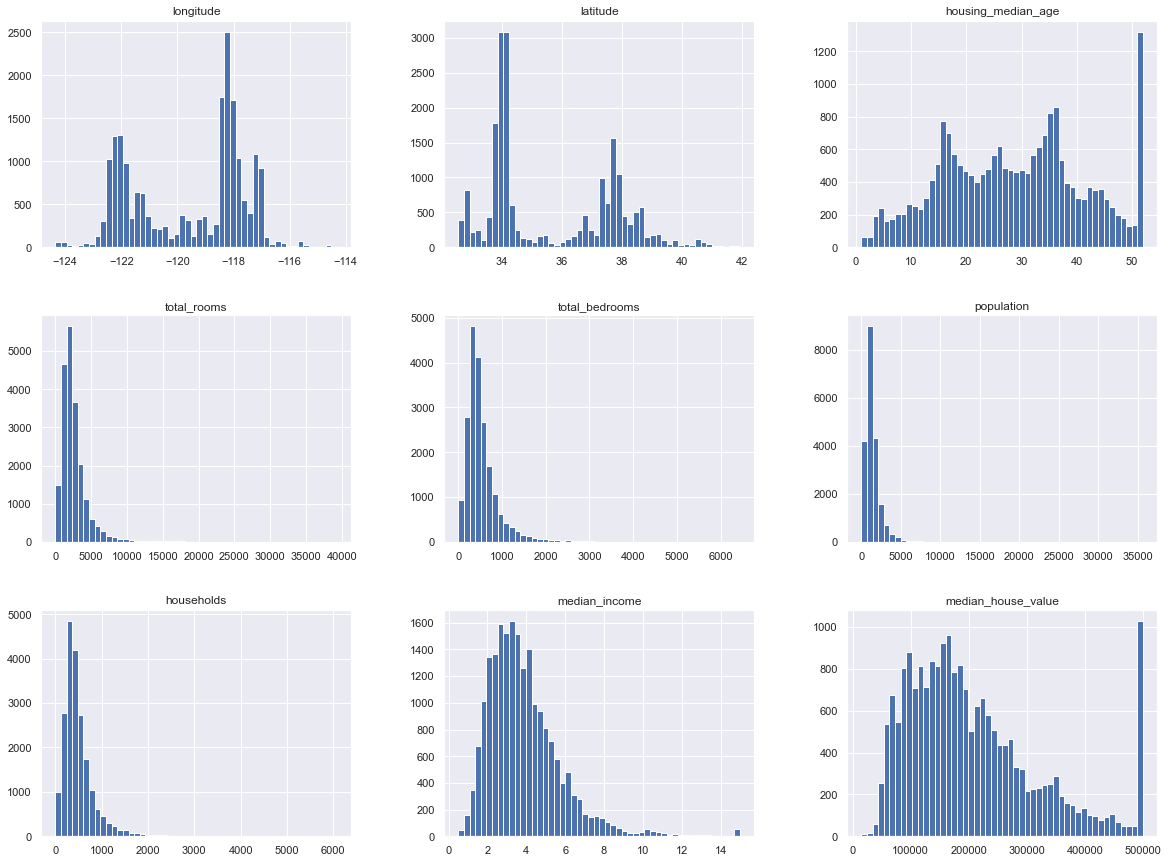

In [5]:
%matplotlib inline
housing.hist(bins=50, figsize=(20, 15))
plt.show()

### Split dataset into train and test set

In [6]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

We make use of stratified sampling to ensure that our test and train sets are representative of all the income categories in our dataset

<AxesSubplot:>

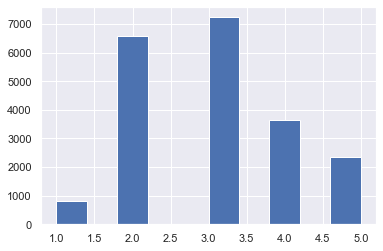

In [7]:
housing['income_cat'] = pd.cut(housing['median_income'],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                              labels=[1, 2, 3, 4, 5])
housing['income_cat'].hist()

### Stratified Sampling based on Income Category

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit

In [9]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [10]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [11]:
housing['income_cat'].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [12]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

In [13]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


In [14]:
housing = strat_train_set.copy()

### Visualizing Geographical Data

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

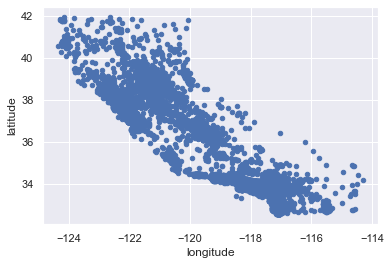

In [15]:
housing.plot(kind='scatter', x='longitude', y='latitude')

Highlighting high-density area

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

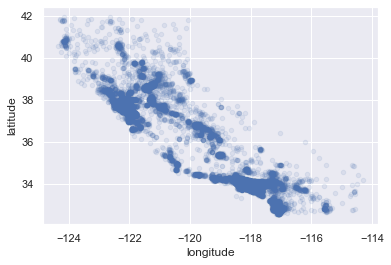

In [16]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

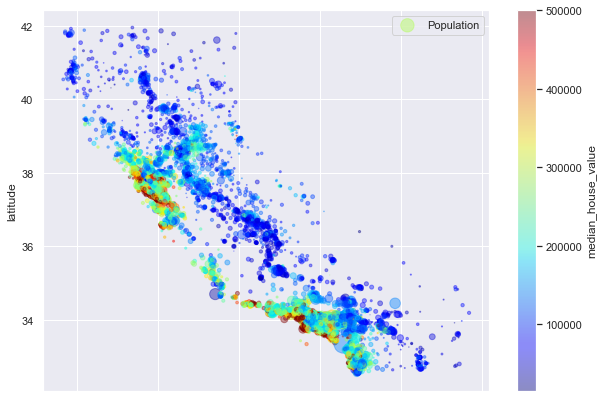

In [17]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
             s=housing['population']/100, label="Population", figsize=(10, 7),
             c="median_house_value", colorbar=True, cmap=plt.get_cmap('jet'))
plt.legend()

### Looking for Correlations

In [18]:
corr_matrix = housing.corr()

corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

Checking correlation using Pandas scatter matrix function

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

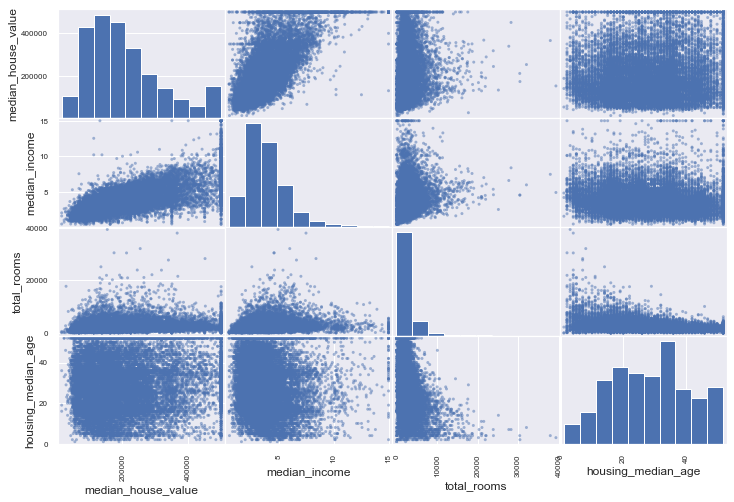

In [19]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12, 8))

### Experimenting with Attribute Combinations

In [20]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing["households"]

In [21]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

### Data Cleaning

In [22]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

Handling Missing data

In [23]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

In [24]:
housing_num = housing.drop("ocean_proximity", axis=1)

imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [25]:
X = imputer.transform(housing_num)

In [26]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

### Handling Text and Categorical Attributes

Enconding categorical variables with OneHot Encoder

In [27]:
from sklearn.preprocessing import OneHotEncoder

housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [28]:
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

Using Custom Transformer

In [29]:
from sklearn.base import BaseEstimator, TransformerMixin

room_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, room_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, room_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [30]:
housing_extra_attribs

array([[-121.89, 37.29, 38.0, ..., '<1H OCEAN', 4.625368731563422,
        2.094395280235988],
       [-121.93, 37.05, 14.0, ..., '<1H OCEAN', 6.008849557522124,
        2.7079646017699117],
       [-117.2, 32.77, 31.0, ..., 'NEAR OCEAN', 4.225108225108225,
        2.0259740259740258],
       ...,
       [-116.4, 34.09, 9.0, ..., 'INLAND', 6.34640522875817,
        2.742483660130719],
       [-118.01, 33.82, 31.0, ..., '<1H OCEAN', 5.50561797752809,
        3.808988764044944],
       [-122.45, 37.77, 52.0, ..., 'NEAR BAY', 4.843505477308295,
        1.9859154929577465]], dtype=object)

### Transformation Pipeline

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [32]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std scaler', StandardScaler()), 
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

Combining numerical and categorical transformations using the column transformer

In [33]:
from sklearn.compose import ColumnTransformer

In [34]:
num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

In [54]:
housing_prepared.shape

(16512, 16)

### Training and Evaluating on the Training Set

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [37]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


Evaluating using kFold cross val

In [38]:
from sklearn.model_selection import cross_val_score

In [39]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, 
                         scoring='neg_mean_squared_error', cv=10)
lin_reg_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(lin_reg_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.674001798347


### Fine Tuning the Model

Using Grid Search

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [41]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [42]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [43]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [44]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

63957.3677644606 {'max_features': 2, 'n_estimators': 3}
55462.48469183936 {'max_features': 2, 'n_estimators': 10}
52854.00394932133 {'max_features': 2, 'n_estimators': 30}
59689.37262957889 {'max_features': 4, 'n_estimators': 3}
53359.45423025956 {'max_features': 4, 'n_estimators': 10}
50400.742203458125 {'max_features': 4, 'n_estimators': 30}
59221.84490837812 {'max_features': 6, 'n_estimators': 3}
52142.050292916996 {'max_features': 6, 'n_estimators': 10}
50170.68758434186 {'max_features': 6, 'n_estimators': 30}
58254.175320842 {'max_features': 8, 'n_estimators': 3}
52118.8711719076 {'max_features': 8, 'n_estimators': 10}
50087.13486966769 {'max_features': 8, 'n_estimators': 30}
61736.298571580104 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54134.34362225396 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59835.82565544204 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52759.29537278799 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}

Fine tuning with Random Search

In [45]:
from sklearn.model_selection import RandomizedSearchCV

In [46]:
rand_search = RandomizedSearchCV(forest_reg, param_distributions=param_grid, n_iter=10,
                                cv=5, return_train_score=True, 
                                 scoring='neg_mean_squared_error')

rand_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions=[{'max_features': [2, 4, 6, 8],
                                         'n_estimators': [3, 10, 30]},
                                        {'bootstrap': [False],
                                         'max_features': [2, 3, 4],
                                         'n_estimators': [3, 10]}],
                   return_train_score=True, scoring='neg_mean_squared_error')

In [47]:
rand_search.best_params_

{'n_estimators': 30, 'max_features': 4}

In [48]:
cvres1 = rand_search.cv_results_
for mean_score, params in zip(cvres1['mean_test_score'], cvres1['params']):
    print(np.sqrt(-mean_score), params)

62152.17875984852 {'n_estimators': 3, 'max_features': 2, 'bootstrap': False}
63513.006939622246 {'n_estimators': 3, 'max_features': 2}
54297.15054759907 {'n_estimators': 10, 'max_features': 2, 'bootstrap': False}
52744.999172505195 {'n_estimators': 30, 'max_features': 2}
52863.59939902772 {'n_estimators': 10, 'max_features': 3, 'bootstrap': False}
61017.87354054787 {'n_estimators': 3, 'max_features': 4}
50570.87563853896 {'n_estimators': 30, 'max_features': 4}
59373.494847272355 {'n_estimators': 3, 'max_features': 8}
52142.454172615755 {'n_estimators': 10, 'max_features': 8}
54895.69972922919 {'n_estimators': 10, 'max_features': 2}


### Checking Feature Importance

In [49]:
feature_importance = rand_search.best_estimator_.feature_importances_

feature_importance

array([9.24190652e-02, 9.41021888e-02, 4.21256376e-02, 2.30613988e-02,
       1.97530685e-02, 2.21991543e-02, 2.00871430e-02, 2.86636016e-01,
       7.33099988e-02, 1.03433213e-01, 7.57172671e-02, 2.15825108e-02,
       1.14370962e-01, 1.32022479e-04, 4.57243540e-03, 6.49791765e-03])

In [50]:
extra_attribs = ['rooms_per_hhold', 'pop_per_hhold', 'bedrm_per_room']
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importance, attributes), reverse=True)

[(0.28663601605331124, 'median_income'),
 (0.11437096207352264, 'INLAND'),
 (0.1034332134250787, 'pop_per_hhold'),
 (0.09410218878790712, 'latitude'),
 (0.09241906519680906, 'longitude'),
 (0.07571726712689326, 'bedrm_per_room'),
 (0.0733099987916554, 'rooms_per_hhold'),
 (0.042125637617699135, 'housing_median_age'),
 (0.02306139881202613, 'total_rooms'),
 (0.022199154271471, 'population'),
 (0.021582510843339557, '<1H OCEAN'),
 (0.020087142973004703, 'households'),
 (0.019753068494922695, 'total_bedrooms'),
 (0.0064979176522995865, 'NEAR OCEAN'),
 (0.004572435401145993, 'NEAR BAY'),
 (0.00013202247891380467, 'ISLAND')]

### Evaluating the Model on the Test Set

In [51]:
from sklearn.metrics import mean_squared_error

final_model = rand_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test) 

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [52]:
final_rmse

47573.865258558224